### Import libraries here

In [1]:
libPath = '/home/mayank/Documents/upgraded-octo-lamp/'
import sys
sys.path.append(libPath)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from v2i.src.core.common import loadPKL

### Homogeneous Datafiles path

In [2]:
heterogeneousOnlyLocalView15mPath = '/home/mayank/ray_results/homogeneous-no-reaction-time-only-local-view-15m/PPO_v2i-v0_0_2019-11-18_18-13-51rysgcb7d/data_tf_disabled.pkl'
heterogeneousLV15Comm15Path = '/home/mayank/ray_results/homogeneous-no-reaction-time-LV-15m-Comm-15m/PPO_v2i-v0_0_2019-11-18_00-54-15sjghssfa/data_tf_disabled.pkl'
#heterogeneousOnlyLocalView15mPath '/home/mayank/ray_results/heterogeneous-only-local-view-15m/PPO_v2i-v0_0_2019-11-06_01-29-19wd1ehb7g/data_tf_disabled.pkl'


### Homogeneous no reaction time Datafiles path

# IDM vs no Reaction time IDM

In [3]:
idmDataHomo = loadPKL(idmData)
idmDataHomoNoReact = loadPKL(homoNoReactIdmData)

NameError: name 'idmData' is not defined

In [5]:
idmDataCars = {}

for carID in idmDataHomo[0][0].keys():
    idmDataCars[carID] = []

for episode in idmDataHomo[0].keys():
    #print(idmDataHomo[0][episode].keys())
    for carID in idmDataHomo[0][episode].keys():
        idmDataCars[carID].append(idmDataHomo[0][episode][carID])

In [6]:
idmDataCarsHomoNoReact = {}

for carID in idmDataHomoNoReact[0][0].keys():
    idmDataCarsHomoNoReact[carID] = []

for episode in idmDataHomoNoReact[0].keys():
    for carID in idmDataHomoNoReact[0][episode].keys():
        idmDataCarsHomoNoReact[carID].append(idmDataHomoNoReact[0][episode][carID])

<IPython.core.display.Javascript object>


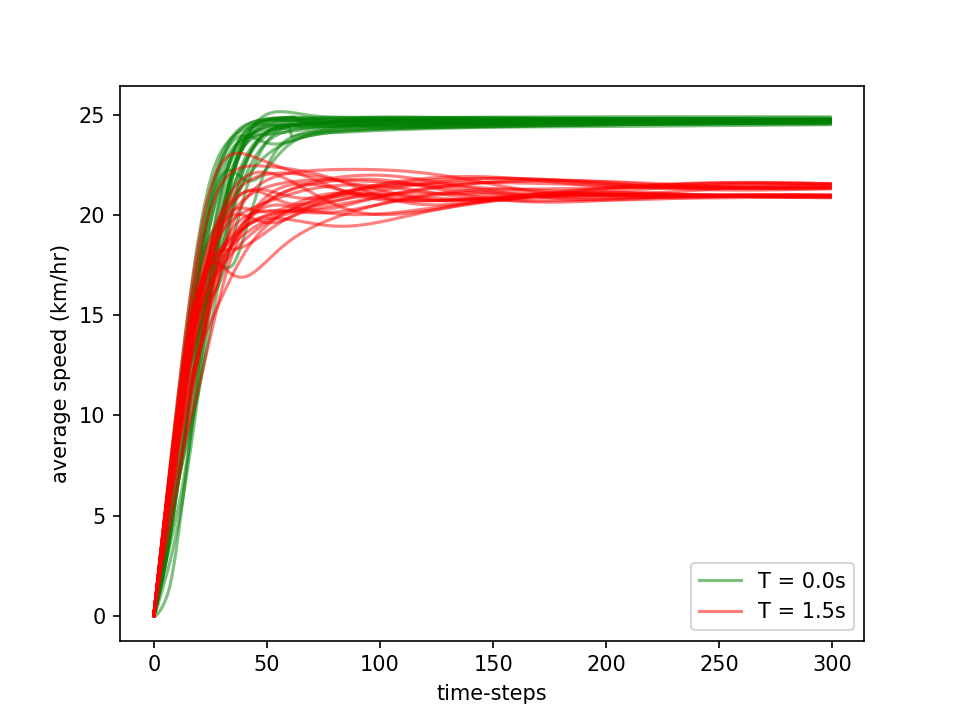

In [7]:

for idx, carID in enumerate(idmDataCarsHomoNoReact.keys()):
    speedData = np.array(idmDataCarsHomoNoReact[carID]).mean(axis=0)
    speedData *= 3.6
    if idx == len(list(idmDataCarsHomoNoReact.keys()))-1:
        plt.plot(speedData[0:300], alpha=0.5, color='green', label='T = 0.0s')
    else:
        plt.plot(speedData[0:300], alpha=0.5, color='green')

for idx, carID in enumerate(idmDataCars.keys()):
    speedData = np.array(idmDataCars[carID]).mean(axis=0)
    speedData *= 3.6
    if idx == len(list(idmDataCars.keys()))-1:
        plt.plot(speedData[0:300], color='red', alpha=0.5, label='T = 1.5s')
    else:
        plt.plot(speedData[0:300], color='red', alpha=0.5)

plt.xlabel('time-steps')
plt.ylabel('average speed (km/hr)')
plt.legend()
#plt.ylim([24, 28])

# Homogeneous - Only Local view 15m

In [5]:
homoLocalView15mData = loadPKL(heterogeneousOnlyLocalView15mPath)

In [6]:
homoLocalView15mData['max-episode-length']

3200

In [7]:
density = list(homoLocalView15mData['data'].keys())[0]
print(density)

0.30000000000000004_0.30000000000000004


In [8]:
agentSpeedEpisodesHomoLV15m = {}
agentSpeedEpisodesHomoLV15m['complete'] = {}
agentSpeedEpisodesHomoLV15m['uncomplete'] = {}

for carID in homoLocalView15mData['data'][density][0]['speed'].keys():
    agentSpeedEpisodesHomoLV15m['complete'][carID] = []
    agentSpeedEpisodesHomoLV15m['uncomplete'][carID] = []
    
totalEpisodes = 0
completeCount = 0
for episode in homoLocalView15mData['data'][density]:
    episodeLen = len(homoLocalView15mData['data'][density][episode]['speed'][0.0])
    print(episodeLen)
    if episodeLen-1 == homoLocalView15mData['max-episode-length']:
        completeCount += 1
        for carID in homoLocalView15mData['data'][density][episode]['speed']:
            agentSpeedEpisodesHomoLV15m['complete'][carID].append(homoLocalView15mData['data'][density][episode]['speed'][carID])
    else:
        for carID in homoLocalView15mData['data'][density][episode]['speed']:
            agentSpeedEpisodesHomoLV15m['uncomplete'][carID].append(homoLocalView15mData['data'][density][episode]['speed'][carID])
    
    totalEpisodes += 1

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)


3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
3201
Percentage of full episodes :  100.0


# Homogeneous - LV 15m + Comm 15m

In [9]:
homoLV15mComm15mData = loadPKL(heterogeneousLV15Comm15Path)

In [10]:
homoLV15mComm15mData.keys()

dict_keys(['maxSpeed', 'maxViewSpeed', 'plan-acts', 'query-acts', 'max-episode-length', 'data', 'others'])

In [11]:
agentSpeedEpisodesHomoLV15mComm15m = {}
agentSpeedEpisodesHomoLV15mComm15m['complete'] = {}
agentSpeedEpisodesHomoLV15mComm15m['uncomplete'] = {}

for carID in homoLV15mComm15mData['data'][density][0]['speed'].keys():
    agentSpeedEpisodesHomoLV15mComm15m['complete'][carID] = []
    agentSpeedEpisodesHomoLV15mComm15m['uncomplete'][carID] = []
    
totalEpisodes = 0
completeCount = 0
for episode in homoLV15mComm15mData['data'][density]:
    episodeLen = len(homoLV15mComm15mData['data'][density][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLV15mComm15mData['max-episode-length']:
        completeCount += 1
        for carID in homoLV15mComm15mData['data'][density][episode]['speed']:
            agentSpeedEpisodesHomoLV15mComm15m['complete'][carID].append(homoLV15mComm15mData['data'][density][episode]['speed'][carID])
    else:
        for carID in homoLV15mComm15mData['data'][density][episode]['speed']:
            agentSpeedEpisodesHomoLV15mComm15m['uncomplete'][carID].append(homoLV15mComm15mData['data'][density][episode]['speed'][carID])
    
    totalEpisodes += 1

print("Percentage of full episodes : ", completeCount/totalEpisodes * 100.0)


Percentage of full episodes :  100.0


# Plot all

6.983457503106699


<IPython.core.display.Javascript object>


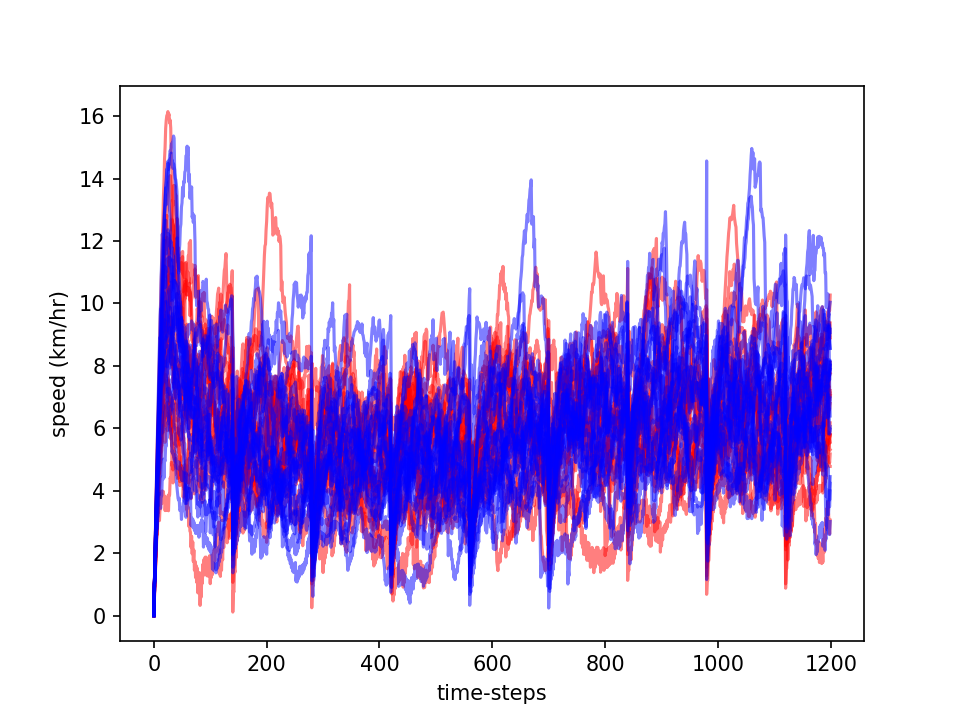

6.32098654915682
6.792513959640583
8.155099461401138
6.874592493317629
5.9775522603155276
5.511005925245495
6.231292371840168
5.442225675442026
7.395990411754622
4.283258662566544
7.768150919798782
6.566946008621442
6.431774296691256
5.87995616447816
6.535932495572481
6.722616037810779
6.119222063153553


"\n\nfor carID in idmDataCars.keys():\n    speedData = np.array(idmDataCarsHomoNoReact[carID]).transpose()\n    speedData = speedData.mean(axis=1)\n    plt.plot(speedData * 3.6, color='green', alpha=0.3)\n    plt.xlabel('time-steps')\n    plt.ylabel('speed (km/hr)')\n    #plt.legend()\nplt.show()\n"

In [12]:
for carID in agentSpeedEpisodesHomoLV15mComm15m['complete'].keys():
    speedData = np.array(agentSpeedEpisodesHomoLV15mComm15m['complete'][carID]).transpose()
    speedData = speedData.mean(axis=1) * 3.6
    print(speedData.mean())
    plt.plot(speedData[0:1200], alpha=.5, color='red')
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
plt.show()


for carID in agentSpeedEpisodesHomoLV15m['complete'].keys():
    speedData = np.array(agentSpeedEpisodesHomoLV15m['complete'][carID]).transpose()
    speedData = speedData.mean(axis=1) * 3.6
    plt.plot(speedData[0:1200], alpha=.5, color='blue')
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
plt.show()
'''

for carID in idmDataCars.keys():
    speedData = np.array(idmDataCarsHomoNoReact[carID]).transpose()
    speedData = speedData.mean(axis=1)
    plt.plot(speedData * 3.6, color='green', alpha=0.3)
    plt.xlabel('time-steps')
    plt.ylabel('speed (km/hr)')
    #plt.legend()
plt.show()
'''

# Querying

In [13]:
agentQueryEpisodesHomoLV15mComm15m = {}
agentQueryEpisodesHomoLV15mComm15m['complete'] = []
agentQueryEpisodesHomoLV15mComm15m['uncomplete'] = []
    

totalEpisodes = 0
completeCount = 0
for episode in homoLV15mComm15mData['data'][density]:
    episodeLen = len(homoLV15mComm15mData['data'][density][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLV15mComm15mData['max-episode-length']:
        completeCount += 1
        agentQueryEpisodesHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data'][density][episode]['actions'])
    else:
        agentQueryEpisodesHomoLV15mComm15m['uncomplete'].append(homoLV15mComm15mData['data'][density][episode]['actions'][1])
    
    totalEpisodes += 1


In [14]:
# Encode actions and separate plan and query
agentPlanHomoLV15mComm15 = []
agentQueryHomoLV15mComm15 = []

for data in agentQueryEpisodesHomoLV15mComm15m['complete']:
    plantmp = []
    querytmp = []
    for step in data:
        plantmp.append(step[0])
        querytmp.append(step[1])
    agentPlanHomoLV15mComm15.append(plantmp)
    agentQueryHomoLV15mComm15.append(querytmp)

planEncode = {}
planEncode['acc'] = 0
planEncode['dec'] = 1
planEncode['do-nothing'] = 2
planEncode['lane-change'] = 3

queryEncode = {}
queryEncode['null'] = 0
queryEncode['reg_0'] = 1
queryEncode['reg_1'] = 2

for i, data in enumerate(agentPlanHomoLV15mComm15):
    for j, step in enumerate(agentPlanHomoLV15mComm15[i]):
        agentPlanHomoLV15mComm15[i][j] = planEncode[agentPlanHomoLV15mComm15[i][j]]

for i, data in enumerate(agentQueryHomoLV15mComm15):
    for j, step in enumerate(agentQueryHomoLV15mComm15[i]):
        agentQueryHomoLV15mComm15[i][j] = queryEncode[agentQueryHomoLV15mComm15[i][j]]


<IPython.core.display.Javascript object>


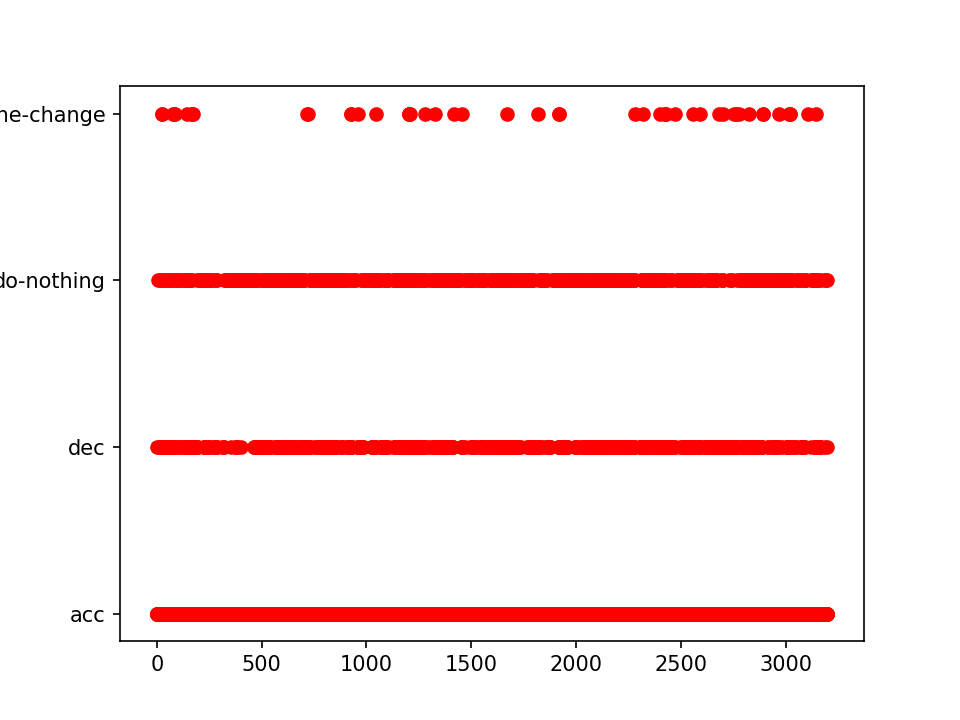

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [15]:
'''
for p in agentQueryHomoLV15mComm15:
    plt.scatter(np.arange(0, len(p)), p, color='red')
    plt.yticks(np.arange(0, len(queryEncode)), queryEncode.keys())
    break
'''
plt.scatter(np.arange(0, len(agentQueryHomoLV15mComm15[4])), agentQueryHomoLV15mComm15[4], color='red', label='local view 15m + comm 15m')
plt.yticks(np.arange(0, len(queryEncode)), queryEncode.keys())
plt.legend

<IPython.core.display.Javascript object>


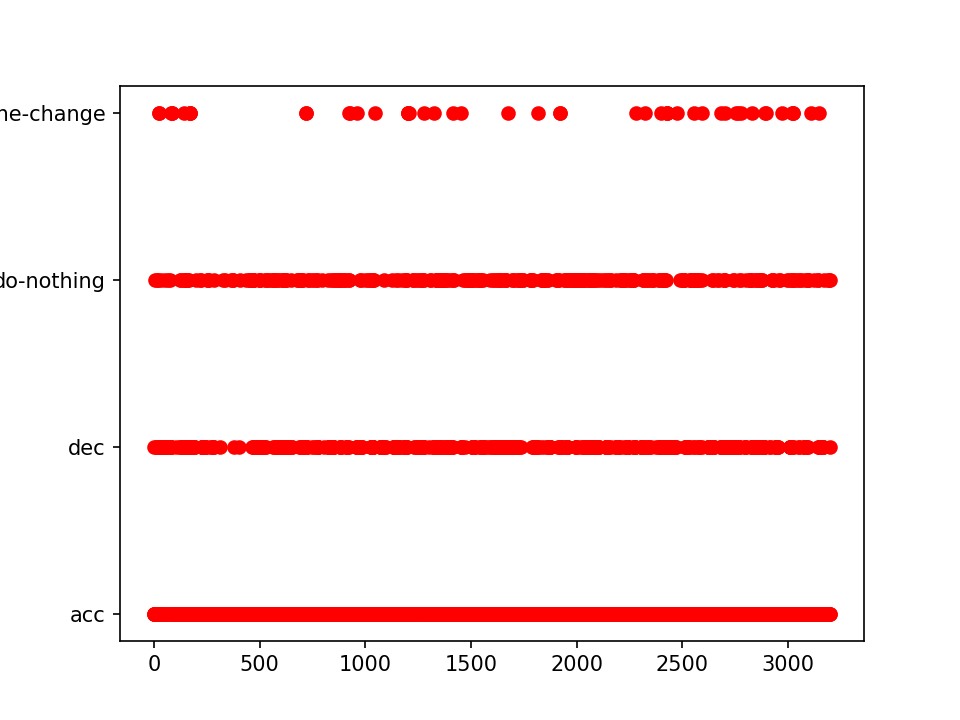

([<matplotlib.axis.YTick at 0x7f051ef60438>,
 <a list of 4 Text yticklabel objects>)

In [17]:
'''
for p in agentPlanHomoLV15mComm15:
    plt.scatter(np.arange(0, len(p)), p, color='red')
    plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())
    break
'''
plt.scatter(np.arange(0, len(agentPlanHomoLV15mComm15[0])), agentPlanHomoLV15mComm15[0], color='red')
plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())

# Local view actions

In [18]:
agentQueryEpisodesHomoLocalView15m = {}
agentQueryEpisodesHomoLocalView15m['complete'] = []
agentQueryEpisodesHomoLocalView15m['uncomplete'] = []
    

totalEpisodes = 0
completeCount = 0
for episode in homoLocalView15mData['data'][density]:
    episodeLen = len(homoLocalView15mData['data'][density][episode]['speed'][0.0])
    #print(episodeLen)
    if episodeLen-1 == homoLocalView15mData['max-episode-length']:
        completeCount += 1
        agentQueryEpisodesHomoLocalView15m['complete'].append(homoLocalView15mData['data'][density][episode]['actions'])
    else:
        agentQueryEpisodesHomoLocalView15m['uncomplete'].append(homoLocalView15mData['data'][density][episode]['actions'][1])
    
    totalEpisodes += 1


In [19]:
agentPlanHomoLocalView15m = []

for data in agentQueryEpisodesHomoLocalView15m['complete']:
    plantmp = []
    for step in data:
        plantmp.append(step[0])
    agentPlanHomoLocalView15m.append(plantmp)

for i, data in enumerate(agentPlanHomoLocalView15m):
    for j, step in enumerate(agentPlanHomoLocalView15m[i]):
        agentPlanHomoLocalView15m[i][j] = planEncode[agentPlanHomoLocalView15m[i][j]]

<IPython.core.display.Javascript object>


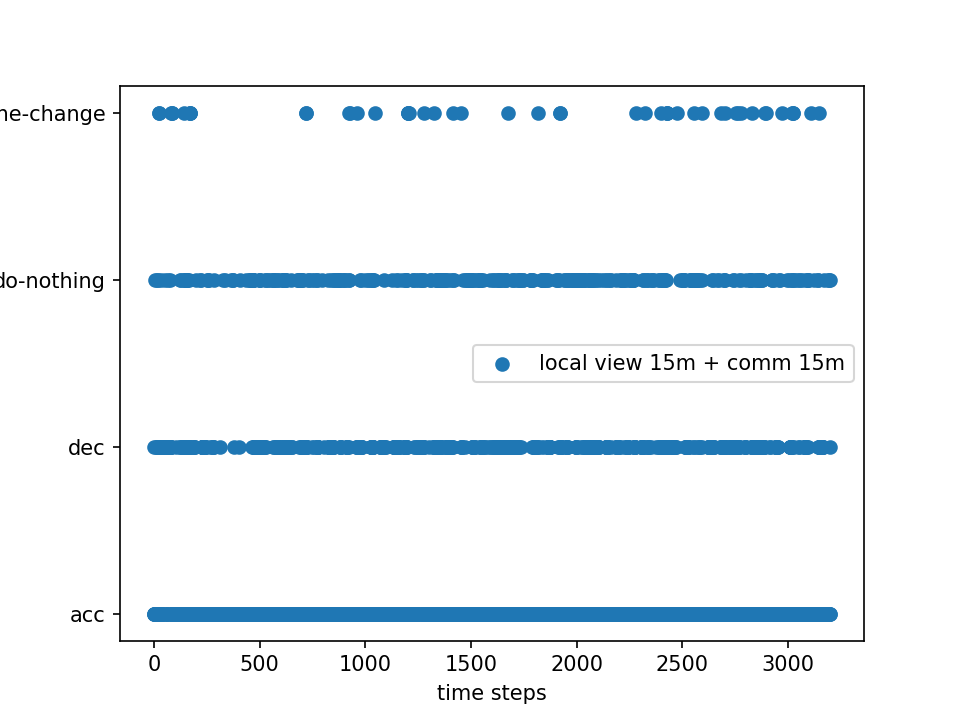

In [20]:
#plt.scatter(np.arange(0, len(agentPlanHomoLocalView15m[3])), agentPlanHomoLocalView15m[3], label='local view 15m')
plt.scatter(np.arange(0, len(agentPlanHomoLV15mComm15[0])), agentPlanHomoLV15mComm15[0], label='local view 15m + comm 15m')
plt.yticks(np.arange(0, len(planEncode)), planEncode.keys())
plt.xlabel('time steps')
plt.legend()

# analyze agent speed initial for Local View and LV + Comm

In [21]:
lvSpeedOfAgent = []
for episode in homoLocalView15mData['data'][density].keys():
    agentCarID = homoLocalView15mData['data'][density][episode]['agentCarID']
    epLen = len(homoLocalView15mData['data'][density][episode]['speed'][agentCarID])
    
    if epLen == (homoLocalView15mData['max-episode-length'] + 1):
        agentCarID = homoLocalView15mData['data'][density][episode]['agentCarID']
        speedData = homoLocalView15mData['data'][density][episode]['speed'][agentCarID]
        #print(speedData)
        lvSpeedOfAgent.append(speedData)

lvSpeedOfAgent = np.array(lvSpeedOfAgent)
print(lvSpeedOfAgent.shape)

(20, 3201)


In [22]:
print(lvSpeedOfAgent.mean() * 3.6)
lvSpeedOfAgent = lvSpeedOfAgent.mean(axis=0)
lvSpeedOfAgent *= 3.6
lvSpeedOfAgent.shape

10.469736157450786


(3201,)

In [23]:
lvCommSpeedOfAgent = []
for episode in homoLV15mComm15mData['data'][density].keys():
    agentCarID = homoLV15mComm15mData['data'][density][episode]['agentCarID']
    epLen = len(homoLV15mComm15mData['data'][density][episode]['speed'][agentCarID])
    
    if epLen == (homoLV15mComm15mData['max-episode-length'] + 1):
        agentCarID = homoLV15mComm15mData['data'][density][episode]['agentCarID']
        speedData = homoLV15mComm15mData['data'][density][episode]['speed'][agentCarID]
        lvCommSpeedOfAgent.append(speedData)
    
lvCommSpeedOfAgent = np.array(lvCommSpeedOfAgent)
print(lvCommSpeedOfAgent.shape)

(20, 3201)


In [24]:
print(lvCommSpeedOfAgent.mean() * 3.6)
lvCommSpeedOfAgent = lvCommSpeedOfAgent.mean(axis=0)
lvCommSpeedOfAgent *= 3.6
print(lvCommSpeedOfAgent.shape)

10.474995463917518
(3201,)


<IPython.core.display.Javascript object>


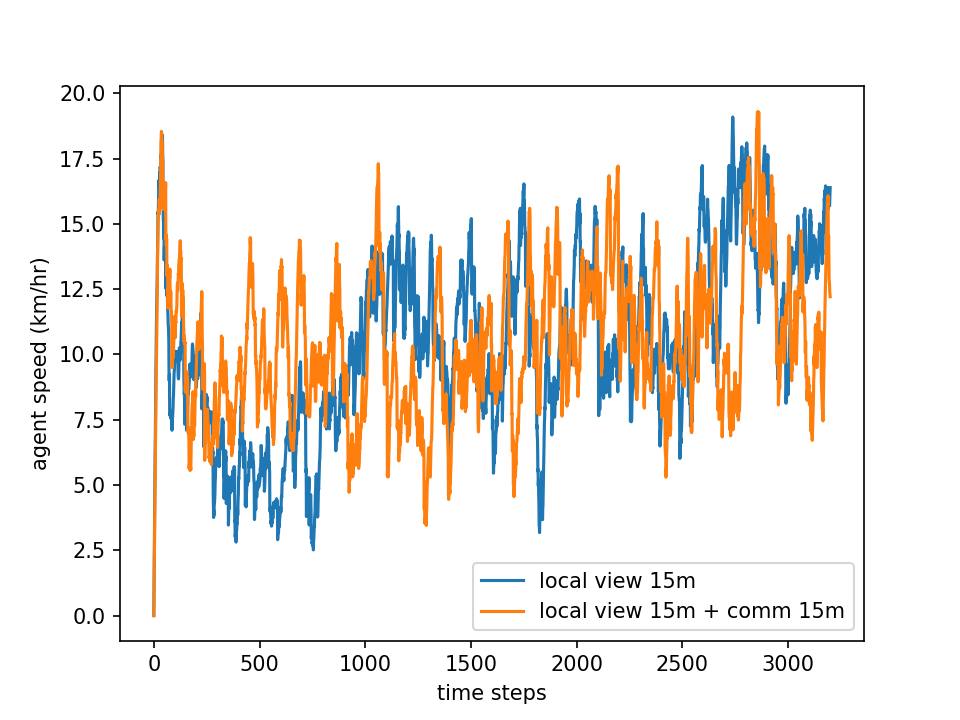

In [25]:
plt.plot(lvSpeedOfAgent, label='local view 15m')
plt.plot(lvCommSpeedOfAgent, label='local view 15m + comm 15m')
plt.xlabel('time steps')
plt.ylabel('agent speed (km/hr)')
plt.legend()

# Cars position graph

In [37]:
allCarsPos = {}
allCarsPos['complete'] = []
allCarsPos['uncomplete'] = []

carIDs = homoLocalView15mData['data']['0.30000000000000004_0.30000000000000004'][0]['Pos'][0].keys()
#print(carIDs)

for episode in homoLocalView15mData['data']['0.30000000000000004_0.30000000000000004'].keys():
    posVector = homoLocalView15mData['data']['0.30000000000000004_0.30000000000000004'][episode]['Pos']
    epLen = len(posVector)
    #print(epLen)
    if epLen-1 == homoLocalView15mData['max-episode-length']:
        
        tmpDict= {}
        for carID in carIDs:
            tmpDict[carID] = []
        
        for step in posVector:
            for car in step.keys():
                tmpDict[car].append(step[car])
        
        allCarsPos['complete'].append(tmpDict.copy())

<IPython.core.display.Javascript object>


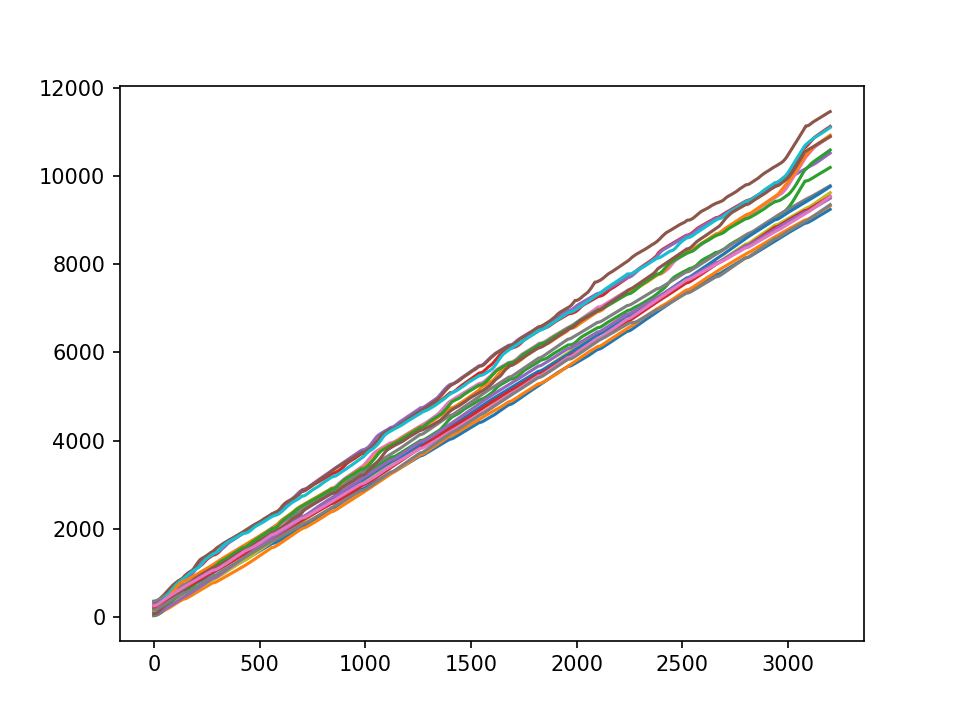

In [38]:
for episode in range(0, len(allCarsPos['complete'])):
    for carID in allCarsPos['complete'][episode].keys():
        plt.plot(allCarsPos['complete'][episode][carID])
    plt.show()
    break

In [40]:
allCarsPosComm15m = {}
allCarsPosComm15m['complete'] = []
allCarsPosComm15m['uncomplete'] = []

carIDs = homoLV15mComm15mData['data']['0.30000000000000004_0.30000000000000004'][0]['Pos'][0].keys()
#print(carIDs)

for episode in homoLV15mComm15mData['data']['0.30000000000000004_0.30000000000000004'].keys():
    posVector = homoLV15mComm15mData['data']['0.30000000000000004_0.30000000000000004'][episode]['Pos']
    epLen = len(posVector)
    #print(epLen)
    if epLen-1 == homoLV15mComm15mData['max-episode-length']:
        
        tmpDict= {}
        for carID in carIDs:
            tmpDict[carID] = []
        
        for step in posVector:
            for car in step.keys():
                tmpDict[car].append(step[car])
        
        allCarsPosComm15m['complete'].append(tmpDict.copy())

<IPython.core.display.Javascript object>


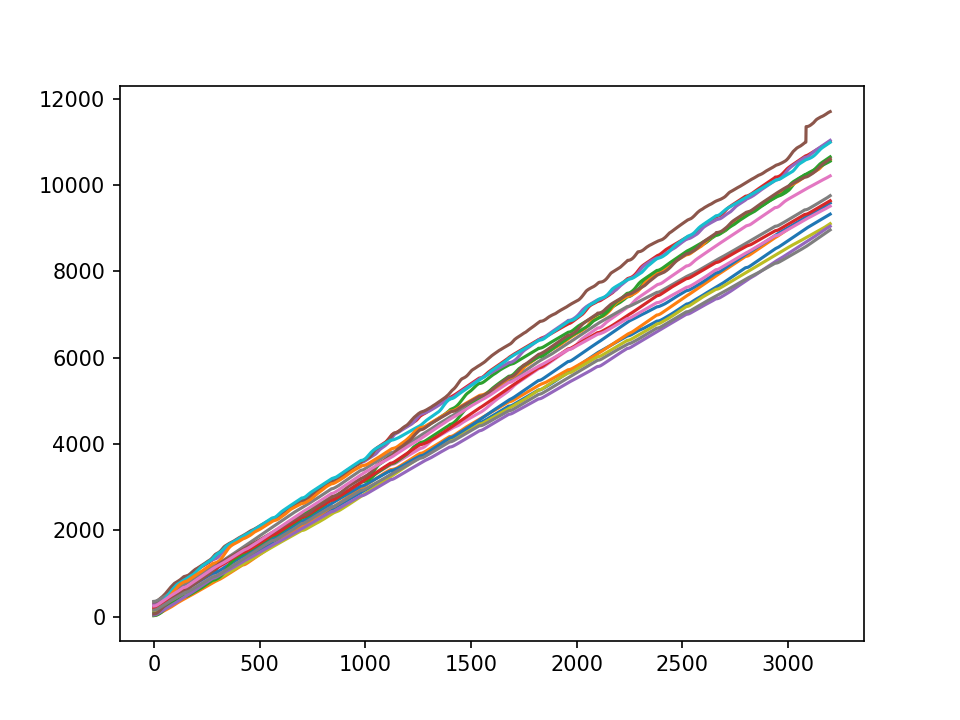

In [41]:
for episode in range(0, len(allCarsPosComm15m['complete'])):
    for carID in allCarsPosComm15m['complete'][episode].keys():
        plt.plot(allCarsPosComm15m['complete'][episode][carID])
    plt.show()
    break

# Speed vs position Graph

In [136]:
# use previous plots data (just dont't take mean on axis=0)

In [42]:
print(lvSpeedOfAgent.shape)
print(lvPosVector.shape)
print(lvCommSpeedOfAgent.shape)
print(lvCommPosVector.shape)

(3201,)


NameError: name 'lvPosVector' is not defined

<IPython.core.display.Javascript object>


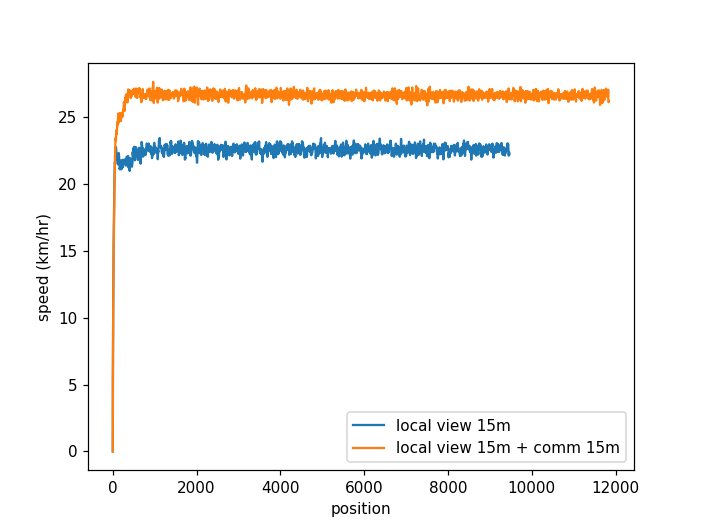

In [164]:
plt.plot(lvPosVector.mean(axis=0), lvSpeedOfAgent.mean(axis=0) * 3.6, label='local view 15m')
plt.plot(lvCommPosVector.mean(axis=0), lvCommSpeedOfAgent.mean(axis=0) *3.6, label='local view 15m + comm 15m')
plt.xlabel('position')
plt.ylabel('speed (km/hr)')
plt.legend()

# Distance to vehicle in front and back

### Homo Local view

In [27]:
frontDist = {}
frontDist['complete'] = []

for episode in homoLocalView15mData['data'][density].keys():
    epLen = len(homoLocalView15mData['data'][density][episode]['frontDiff'])
    
    if epLen == homoLocalView15mData['max-episode-length']:
        frontDist['complete'].append(homoLocalView15mData['data'][density][episode]['frontDiff'])

In [28]:
frontDist['complete'] = np.array(frontDist['complete'])
print(frontDist['complete'].shape)

(20, 3200)


In [29]:
backDist = {}
backDist['complete'] = []

for episode in homoLocalView15mData['data'][density].keys():
    epLen = len(homoLocalView15mData['data'][density][episode]['backDiff'])
    
    if epLen == homoLocalView15mData['max-episode-length']:
        backDist['complete'].append(homoLocalView15mData['data'][density][episode]['backDiff'])

In [30]:
backDist['complete'] = np.array(backDist['complete'])
print(backDist['complete'].shape)

(20, 3200)


In [31]:
backDist['complete'].mean(axis=0).shape
frontDist['complete'].mean(axis=0).shape

(3200,)

In [32]:
episodeToPlot = 2

<IPython.core.display.Javascript object>


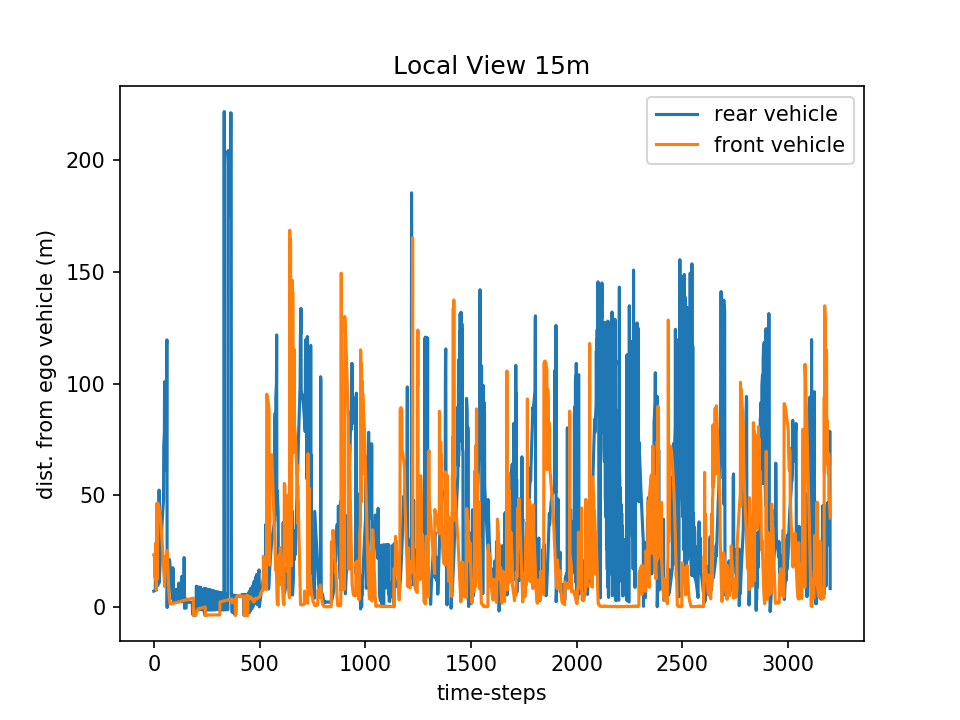

Text(0.5, 1.0, 'Local View 15m')

In [33]:
plt.plot(backDist['complete'][episodeToPlot], label='rear vehicle')
plt.plot(frontDist['complete'][episodeToPlot], label='front vehicle')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.xlabel('time-steps')
plt.title('Local View 15m')

In [34]:
len(agentPlanHomoLocalView15m)

20

In [35]:
len(backDist['complete'])

20

In [36]:
len(agentPlanHomoLocalView15m[episodeToPlot])

3200

In [37]:
mask = np.zeros((len(agentPlanHomoLocalView15m[episodeToPlot]),))
for idx, act in enumerate(agentPlanHomoLocalView15m[episodeToPlot]):
    if planEncode['lane-change'] == act:
        mask[idx] = 1.0
mask = np.multiply(mask, backDist['complete'][episodeToPlot])

<IPython.core.display.Javascript object>


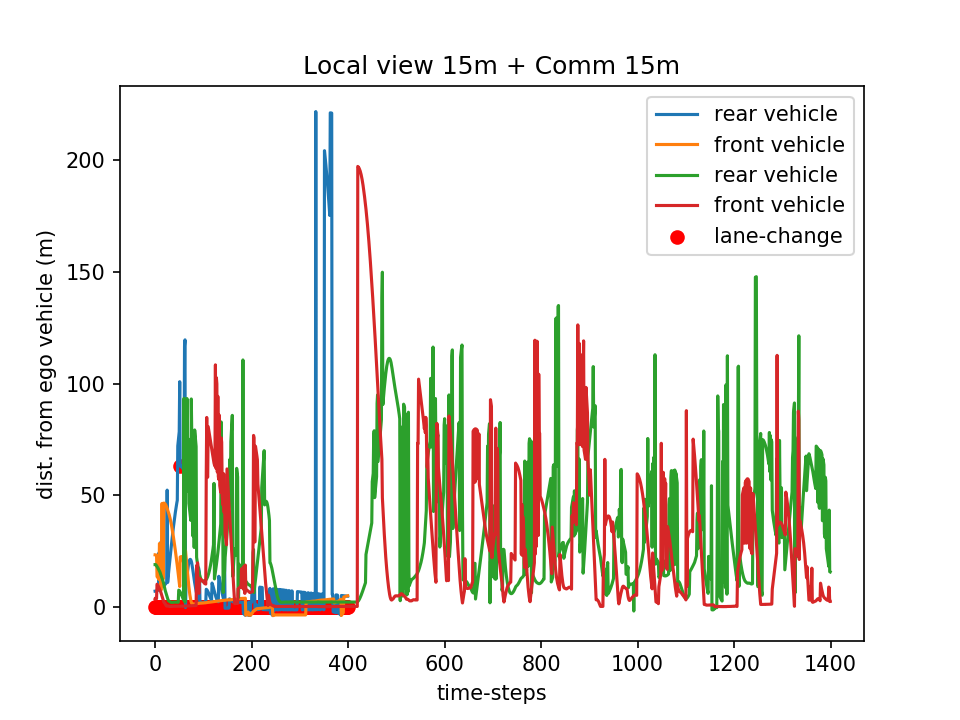

Text(0.5, 1.0, 'Local View 15m')

In [40]:
plt.plot(backDist['complete'][episodeToPlot][0:400], label='rear vehicle')
plt.plot(frontDist['complete'][episodeToPlot][0:400], label='front vehicle')
plt.scatter(np.arange(0, mask.shape[0])[0:400], mask[0:400], color='red', label='lane-change')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.title('Local View 15m')
#plt.ylim([1, 40])

### Homo LV15m +  Comm 15m

In [42]:
frontDistHomoLV15mComm15m = {}
frontDistHomoLV15mComm15m['complete'] = []

for episode in homoLV15mComm15mData['data'][density].keys():
    epLen = len(homoLV15mComm15mData['data'][density][episode]['frontDiff'])
    
    if epLen == homoLV15mComm15mData['max-episode-length']:
        frontDistHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data'][density][episode]['frontDiff'])

In [43]:
frontDistHomoLV15mComm15m['complete'] = np.array(frontDistHomoLV15mComm15m['complete'])
print(frontDistHomoLV15mComm15m['complete'].shape)

(20, 3200)


In [45]:
backDistHomoLV15mComm15m = {}
backDistHomoLV15mComm15m['complete'] = []

for episode in homoLV15mComm15mData['data'][density].keys():
    epLen = len(homoLV15mComm15mData['data'][density][episode]['backDiff'])
    
    if epLen == homoLV15mComm15mData['max-episode-length']:
        backDistHomoLV15mComm15m['complete'].append(homoLV15mComm15mData['data'][density][episode]['backDiff'])

In [46]:
backDistHomoLV15mComm15m['complete'] = np.array(backDistHomoLV15mComm15m['complete'])
print(backDistHomoLV15mComm15m['complete'].shape)

(20, 3200)


In [47]:
episodeToPlot = 0

<IPython.core.display.Javascript object>


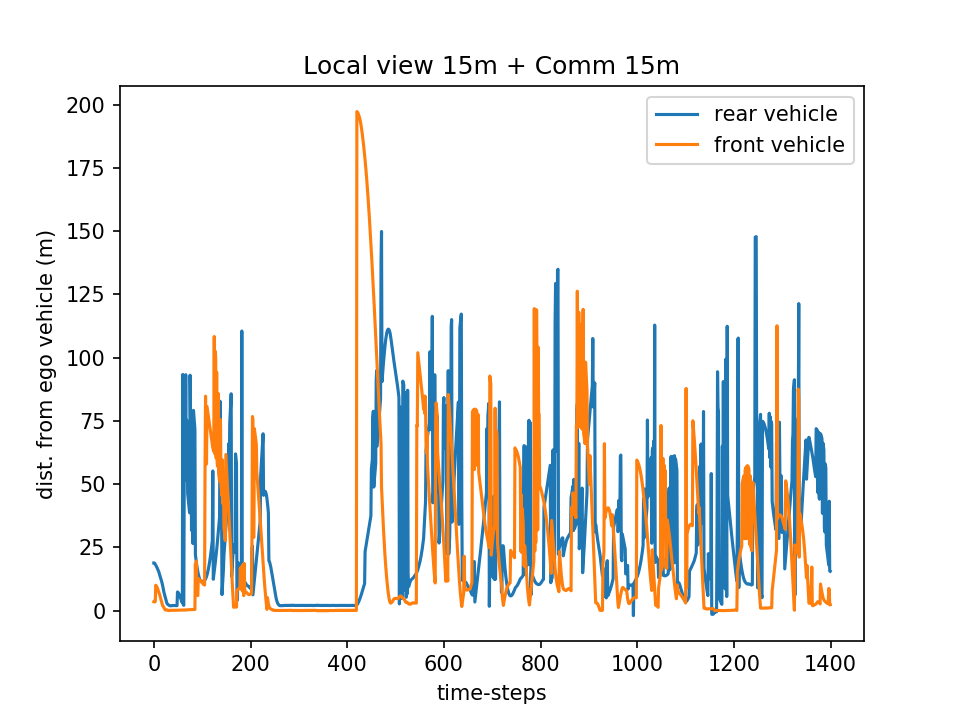

Text(0.5, 0, 'time-steps')

In [49]:
plt.plot(backDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='rear vehicle')
plt.plot(frontDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='front vehicle')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.title("Local view 15m + Comm 15m")
plt.xlabel('time-steps')

In [50]:
len(agentPlanHomoLV15mComm15)

20

In [51]:
len(backDistHomoLV15mComm15m['complete'])

20

In [52]:
len(agentPlanHomoLV15mComm15[episodeToPlot])

3200

In [53]:
mask = np.zeros((len(agentPlanHomoLV15mComm15[episodeToPlot]), ))
for idx, act in enumerate(agentPlanHomoLV15mComm15[episodeToPlot]):
    if planEncode['lane-change'] == act:
        mask[idx] = 1.0
mask = np.multiply(mask, backDistHomoLV15mComm15m['complete'][episodeToPlot])

<IPython.core.display.Javascript object>


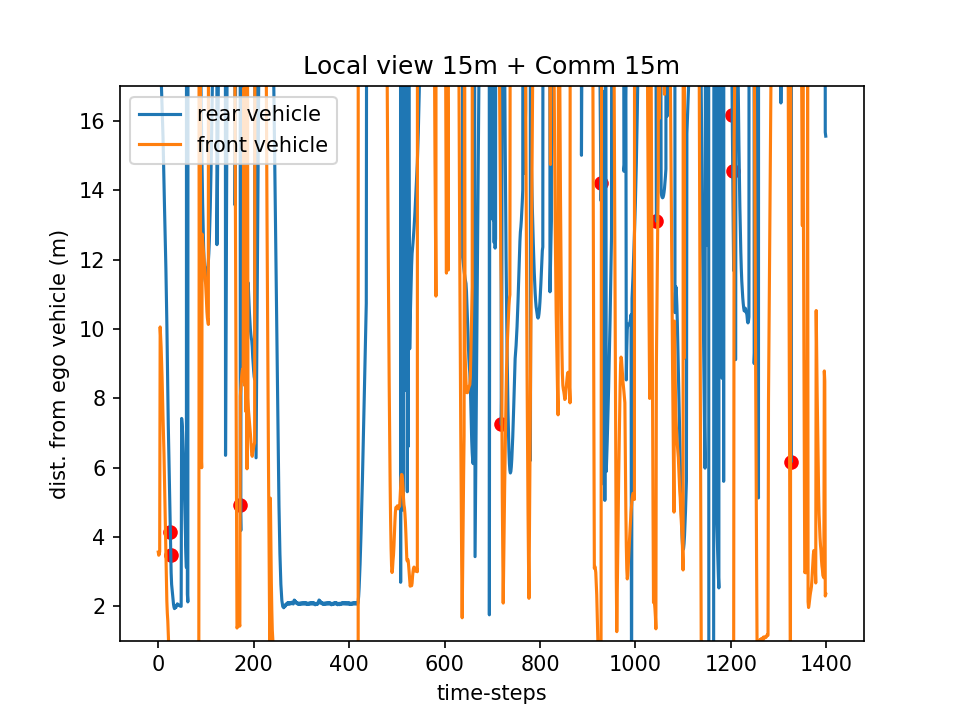

(1, 17)

In [54]:
plt.plot(backDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='rear vehicle')
plt.plot(frontDistHomoLV15mComm15m['complete'][episodeToPlot][0:1400], label='front vehicle')
plt.scatter(np.arange(0, mask.shape[0])[0:1400], mask[0:1400], color='red')
plt.legend()
plt.ylabel('dist. from ego vehicle (m)')
plt.title("Local view 15m + Comm 15m")
plt.xlabel('time-steps')
plt.ylim([1, 17])

<IPython.core.display.Javascript object>


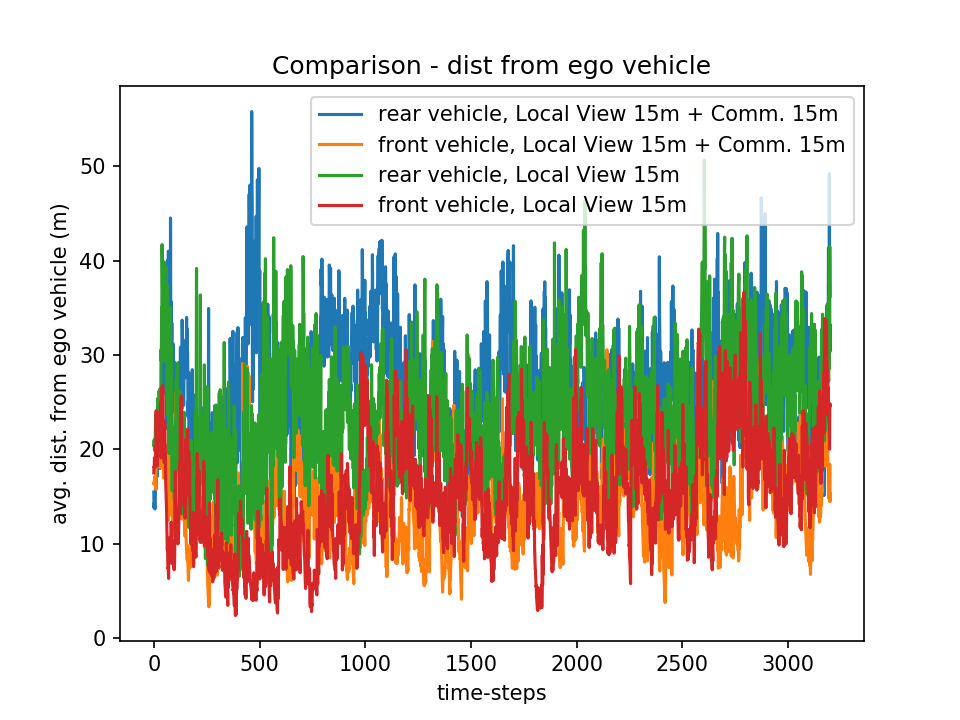

Text(0.5, 0, 'time-steps')

In [55]:
plt.plot(backDistHomoLV15mComm15m['complete'].mean(axis=0), label='rear vehicle, Local View 15m + Comm. 15m')
plt.plot(frontDistHomoLV15mComm15m['complete'].mean(axis=0), label='front vehicle, Local View 15m + Comm. 15m')
plt.plot(backDist['complete'].mean(axis=0), label='rear vehicle, Local View 15m')
plt.plot(frontDist['complete'].mean(axis=0), label='front vehicle, Local View 15m')
plt.legend()
plt.ylabel('avg. dist. from ego vehicle (m)')
plt.title("Comparison - dist from ego vehicle")
plt.xlabel('time-steps')
#plt.ylim([1, 35])